### Bài Thực hành 2 

Xây dựng mô hình từ giải thuật SVM trên dữ liệu các con thú trong rừng. Dữ liệu lấy từ 
https://www.kaggle.com/code/kareemellithy/animal-condition-predict-svm-knn

1. Import các thư viện cần thiết

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [13]:
df = pd.read_csv("Dataset/data.csv")

# Chuẩn hóa chuỗi: bỏ khoảng trắng dư trong tên động vật
df["AnimalName"] = df["AnimalName"].str.strip()
df = df.dropna(subset=["Dangerous"]).copy()
print("Kích thước dữ liệu:", df.shape)
df.head()

Kích thước dữ liệu: (869, 7)


,AnimalName,symptoms1,symptoms2,symptoms3,symptoms4,symptoms5,Dangerous
0,Dog,Fever,Diarrhea,Vomiting,Weight loss,Dehydration,Yes
1,Dog,Fever,Diarrhea,Coughing,Tiredness,Pains,Yes
2,Dog,Fever,Diarrhea,Coughing,Vomiting,Anorexia,Yes
3,Dog,Fever,Difficulty breathing,Coughing,Lethargy,Sneezing,Yes
4,Dog,Fever,Diarrhea,Coughing,Lethargy,Blue Eye,Yes


Số lượng mỗi lớp trong Dangerous:
Dangerous
Yes    849
No      20
Name: count, dtype: int64

Tỉ lệ phần trăm:
Dangerous
Yes    97.698504
No      2.301496
Name: proportion, dtype: float64


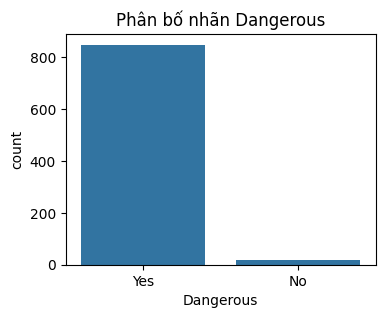

In [14]:
# Khảo sát nhanh cột nhãn "Dangerous"
print("Số lượng mỗi lớp trong Dangerous:")
print(df["Dangerous"].value_counts())
print("\nTỉ lệ phần trăm:")
print(df["Dangerous"].value_counts(normalize=True) * 100)

plt.figure(figsize=(4,3))
sns.countplot(x="Dangerous", data=df)
plt.title("Phân bố nhãn Dangerous")
plt.show()

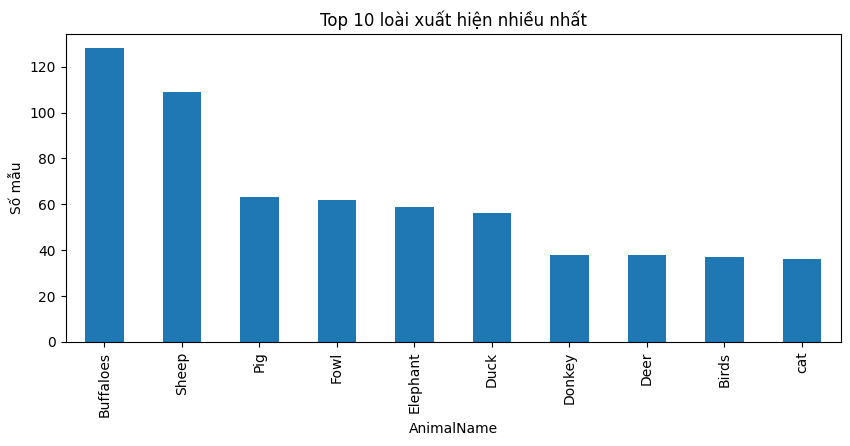

In [15]:
# Khảo sát nhanh theo AnimalName
plt.figure(figsize=(10,4))
df["AnimalName"].value_counts().head(10).plot(kind="bar")
plt.title("Top 10 loài xuất hiện nhiều nhất")
plt.ylabel("Số mẫu")
plt.show()

2. Tiền xử lý dữ liệu

In [16]:
# Mã hóa nhãn 'Dangerous' -> 0 (No), 1 (Yes)
df["Dangerous"] = df["Dangerous"].map({"No": 0, "Yes": 1})

#One-hot encoding cho tất cả cột còn lại (AnimalName, symptoms1..5)
X = pd.get_dummies(
    df.drop("Dangerous", axis=1),
    drop_first=True   # bỏ 1 category trong mỗi cột để tránh đa cộng tuyến
)
y = df["Dangerous"]

print("Số features sau one-hot encoding:", X.shape[1])
X.head()

Số features sau one-hot encoding: 1146


,AnimalName_Black-tailed deer,AnimalName_Buffaloes,AnimalName_Cattle,AnimalName_Chicken,AnimalName_Deer,AnimalName_Dog,AnimalName_Dogs,AnimalName_Donkey,AnimalName_Duck,AnimalName_Elephant,...,symptoms5_restless movement,symptoms5_slow growth,symptoms5_sudden death,symptoms5_swollen abdomen,symptoms5_trembling,symptoms5_twisted neck,symptoms5_urination problem,symptoms5_weakness,symptoms5_ increased passing gas,symptoms5_ pain and bloating
0,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


6. Chia dữ liệu thành tập huấn luyện và kiểm tra

In [17]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,        # 80% train - 20% test
    random_state=42,
    stratify=y            # giữ tỉ lệ lớp giống nhau giữa train/test
)

print("Kích thước X_train:", X_train.shape)
print("Kích thước X_test :", X_test.shape)

Kích thước X_train: (695, 1146)
Kích thước X_test : (174, 1146)


In [19]:
# Chuẩn hóa dữ liệu 
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

7. Xây dựng và huấn luyện mô hình SVM

In [ ]:
#  Dùng kernel RBF vì dữ liệu nhiều feature và có khả năng phi tuyến.

svm_clf = SVC(
    kernel="rbf",
    C=1.0,
    gamma="scale",
    random_state=42
)

svm_clf.fit(X_train_scaled, y_train)

print("Huấn luyện xong mô hình SVM.")

Huấn luyện xong mô hình SVM.


8. Đánh giá mô hình trên train và test

In [21]:
y_train_pred = svm_clf.predict(X_train_scaled)
y_test_pred  = svm_clf.predict(X_test_scaled)

print("Training accuracy:", round(accuracy_score(y_train, y_train_pred), 4))
print("Test accuracy    :", round(accuracy_score(y_test,  y_test_pred), 4))

print("\nClassification report (tập test):")
print(classification_report(y_test, y_test_pred))

Training accuracy: 0.9971
Test accuracy    : 0.9828

Classification report (tập test):
              precision    recall  f1-score   support

           0       1.00      0.25      0.40         4
           1       0.98      1.00      0.99       170

    accuracy                           0.98       174
   macro avg       0.99      0.62      0.70       174
weighted avg       0.98      0.98      0.98       174



9. Vẽ ma trận nhầm lẫn (Confusion Matrix)

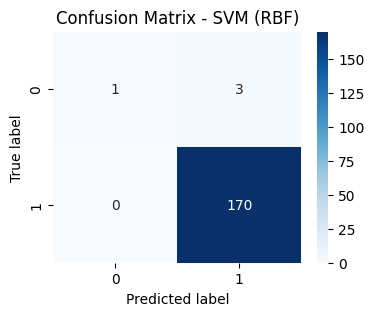

In [22]:
cm = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion Matrix - SVM (RBF)")
plt.show()

10. Thử nhiều kernel khác nhau để so sánh

In [23]:
kernels = ["linear", "poly", "rbf", "sigmoid"]
results = []

for k in kernels:
    clf = SVC(kernel=k, C=1.0, gamma="scale", random_state=42)
    clf.fit(X_train_scaled, y_train)
    acc = clf.score(X_test_scaled, y_test)
    results.append((k, acc))
    print(f"Kernel: {k:7s} -> Test accuracy: {acc:.4f}")

best_kernel, best_acc = max(results, key=lambda x: x[1])
print("\nBest validation accuracy:", best_acc, "with kernel:", best_kernel)

Kernel: linear  -> Test accuracy: 1.0000
Kernel: poly    -> Test accuracy: 0.9885
Kernel: rbf     -> Test accuracy: 0.9828
Kernel: sigmoid -> Test accuracy: 0.9885

Best validation accuracy: 1.0 with kernel: linear
